<a href="https://colab.research.google.com/github/zar373/Telecom_Churn_Analysis/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


In [2]:
tel_df= pd.read_csv("/content/sample_data/Cleaned_Telecom_Dataset_int.csv")
tel_df

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,29.85,29.85,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,56.95,1889.50,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,2,0,53.85,108.15,1,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,3,0,42.30,1840.75,0,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,4,0,70.70,151.65,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,7038,0,84.80,1990.50,0,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
7028,7039,0,103.20,7362.90,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
7029,7040,0,29.60,346.45,0,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
7030,7041,1,74.40,306.60,1,0,1,0,1,1,...,0,0,0,1,1,0,0,0,0,0


In [ ]:
tel_df= tel_df.drop("Unnamed: 0", axis= 1)
tel_df

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,84.80,1990.50,0,0,1,0,1,0,1,...,0,0,0,1,0,1,0,0,0,0
7028,0,103.20,7362.90,0,1,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,1
7029,0,29.60,346.45,0,1,0,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
7030,1,74.40,306.60,1,0,1,0,1,1,0,...,0,0,0,1,1,0,0,0,0,0


In [ ]:
X= tel_df.drop("Churn", axis= 1)
y= tel_df["Churn"]

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state= 44, test_size= 0.3)
X_train

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
3312,0,70.80,4448.80,0,1,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1
234,0,25.15,702.00,1,0,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
5147,0,94.40,2638.10,1,0,1,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
972,0,108.05,7532.15,0,1,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
6520,1,74.85,156.40,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,0,64.90,697.25,1,0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
1197,0,49.40,611.65,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2801,0,86.10,4890.50,0,1,0,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3491,1,69.30,153.80,1,0,0,1,1,0,0,...,0,0,1,0,1,0,0,0,0,0


In [ ]:
lgmod= LogisticRegression(max_iter=1000000, solver='newton-cg')
lgmod.fit(X_train, y_train)

LogisticRegression(max_iter=1000000, solver='newton-cg')

In [ ]:
y_pred= lgmod.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 1])

In [ ]:
print("The Classification Report for the Logistic Regression model is:")
print(classification_report(y_test, y_pred))

The Classification Report for the Logistic Regression model is:
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1534
           1       0.66      0.52      0.58       576

    accuracy                           0.80      2110
   macro avg       0.75      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



In [ ]:
cm= confusion_matrix(y_test, y_pred)
print("Following is the Confusion Matrix for the Logistic Regression is: ")
print(cm)

Following is the Confusion Matrix for the Logistic Regression is: 
[[1379  155]
 [ 275  301]]


Visualization of Confusion Matrix

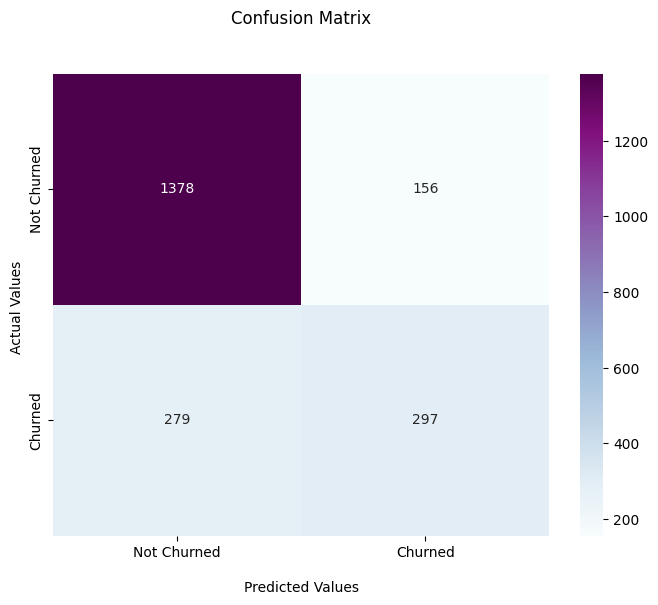

In [ ]:
cm1 = np.array([[1378, 156], [ 279, 297]])
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm1, annot=True, cmap='BuPu', fmt='g')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Churned','Churned'])
ax.yaxis.set_ticklabels(['Not Churned','Churned'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
score= lgmod.score(X_train, y_train)
print(f"The score of the Logistic Regression model is: {score}")

The score of the Logistic Regression model is: 0.8031288094270622


In [ ]:
accuracy= accuracy_score(y_test, y_pred)
print(f"The accuracy of the Logistic Regression model is: {accuracy}")

The accuracy of the Logistic Regression model is: 0.7962085308056872


#Logistic Regression without Python Package

We will apply the Logistic Regression by calculating the value of theta through Gradient Descent Method.

In [ ]:

def sigmoid(X, weight):
  """Calculating Sigmoid/ Logistic Function."""
  z= np.dot(X, weight)
  return 1/(1 + np.exp(-z))


def loss(sig, y):
  """Weights (represented by theta in our notation) is a vital part of Logistic Regression and other Machine Learning algorithms and we want to find the best values for them. To start we pick random values and we need a way to measure how well the algorithm performs using those random weights. That measure is computed using the loss function."""
  return (-y * np.log(sig) - (1 - y) * np.log(1- sig)).mean()


def gradient_descent_logistic(X, sig, y):
  """The goal is to minimize the loss by means of increasing or decreasing the weights, which is commonly called fitting. Which weights should be bigger and which should be smaller?  This can be decided by a function called Gradient descent."""
  return np.dot(X.T, (sig - y))/y.shape[0]

def update_weight(weight, gradient, alpha):
  """The weights are updated by substracting the derivative (gradient descent) times the learning rate."""
  return weight - alpha * gradient





num_iteration= 1000000
intercept= np.ones((X.shape[0], 1))
X= np.concatenate((intercept, X), axis= 1)
theta= np.zeros(X.shape[1])
print(theta.shape)
alpha= 0.01


for i in range(num_iteration):
  sig= sigmoid(X, theta)
  gradient= gradient_descent_logistic(X, sig, y)
  theta= update_weight(theta, gradient, alpha)



(53,)


<ipython-input-26-557af8e387e1>:4: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))


In [ ]:
print(X.shape)
print(y.shape)
print(theta.shape)

(7032, 53)
(7032,)
(53,)


In [ ]:
result= sigmoid(X, theta)



y_predwpp= []
for i in result:
  binary_predictions = (i >= 0.5).astype(int)
  y_predwpp.append(binary_predictions)

y_predwpp= np.array(y_predwpp)
y_predwpp.shape

<ipython-input-26-557af8e387e1>:4: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))


(7032,)

In [ ]:
# y_testwpp= np.array(y)
# y_predwpp= np.array(y_predwpp)



# # For calculating precision, accuracy, recall and f1 score
# TP = FP = TN = FN = 0

# for yt, yp in zip(y_testwpp, y_predwpp):
#   if yt ==1 and yp == 1:
#     TP += 1
#   elif yt== 0 and yp == 1:
#     FP += 1
#   elif yt == 0 and yp == 0:
#     TN += 1
#   elif yt == 1 and yp == 0:
#     FN += 1

# if (TP + FP) !=0:
#   precision= TP / (TP + FP)

# else:
#   precision = 0

# if (TP + FN) != 0:
#   recall = TP / (TP + FN)

# else:
#   recall = 0


# if (precision + recall) != 0:
#   f1_score= 2*(precision * recall) / (precision + recall)

# else:
#   f1_score = 0

# accuracy= (TP + TN) / (TP + TN + FP + FN)

# print(f"The accuracy of the Logistic Regression model without python package is: {accuracy}")
# print(f"The f1 score of the Logistic Regression model without python package is: {f1_score}")
# print(f"The precision of the Logistic Regression model without python package is: {precision}")
# print(f"The recall of the Logistic Regression model without python package is: {recall}")




y_testwpp= np.array(y)
y_predwpp= np.array(y_predwpp)


counts = {
    'TP': {0: 0, 1: 0},
    'FP': {0: 0, 1: 0},
    'TN': {0: 0, 1: 0},
    'FN': {0: 0, 1: 0}
}


for yt, yp in zip(y_testwpp, y_predwpp):
    if yt == yp:
        counts['TP'][yt] += 1
        counts['TN'][1 - yt] += 1
    else:
        counts['FP'][yp] += 1
        counts['FN'][yt] += 1

# Initialize metrics
metrics = {
    'precision': {0: 0, 1: 0},
    'recall': {0: 0, 1: 0},
    'f1_score': {0: 0, 1: 0},
    'accuracy': 0
}

# Calculate Precision, Recall, and F1 Score for both classes
for cls in [0, 1]:
    TP = counts['TP'][cls]
    FP = counts['FP'][cls]
    FN = counts['FN'][cls]
    TN = counts['TN'][cls]

    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    metrics['precision'][cls] = precision
    metrics['recall'][cls] = recall
    metrics['f1_score'][cls] = f1_score

# Calculate overall accuracy
total_correct = sum(counts['TP'].values()) + sum(counts['TN'].values())
total_predictions = len(y_testwpp)
metrics['accuracy'] = total_correct / total_predictions

print(f"Accuracy: {metrics['accuracy']}")
print(f"Precision for class 0: {metrics['precision'][0]}")
print(f"Recall for class 0: {metrics['recall'][0]}")
print(f"F1 Score for class 0: {metrics['f1_score'][0]}")
print(f"Precision for class 1: {metrics['precision'][1]}")
print(f"Recall for class 1: {metrics['recall'][1]}")
print(f"F1 Score for class 1: {metrics['f1_score'][1]}")


The accuracy of the Logistic Regression model without python package is: 0.7861205915813424
The f1 score of the Logistic Regression model without python package is: 0.4976619906479627
The precision of the Logistic Regression model without python package is: 0.6622222222222223
The recall of the Logistic Regression model without python package is: 0.3986088817549492
